# Predicting with models

In [72]:
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
model = load('model_v2.test.joblib') 

In [73]:
df = pd.read_csv("../data/BTCUSDT-hour-predict.csv")

In [74]:
indicators = ['mom_ppo_30_hist',
 'volatility_wband_20',
 'volume_nvi_o_close_rate_50',
 'volatility_bb_wband_200',
 'volume_fi_amplified',
 'trend_sma_200_diff_o_close_log',
 'trend_sma_50_diff_log',
 'trend_vi_50_amp',
 'mom_rsi_30',
 'mom_roc_50_log',
 'mom_wr_50',]

In [75]:
d = df.copy()[-1000:]
d.dropna(inplace=True)
close = d["close"][-1000:]

d = d[list(indicators)].copy().astype(np.float32)

In [76]:
df = d.drop(["target", "close"], axis=1, errors="ignore")

In [77]:
df.tail()

,mom_ppo_30_hist,volatility_wband_20,volume_nvi_o_close_rate_50,volatility_bb_wband_200,volume_fi_amplified,trend_sma_200_diff_o_close_log,trend_sma_50_diff_log,trend_vi_50_amp,mom_rsi_30,mom_roc_50_log,mom_wr_50
32840,0.772684,5.579608,0.251668,37.507843,-15.610298,2.408027,-6.833097,3.421139,49.511169,5.608756,-15.609714
32841,0.797898,5.447798,0.210562,37.444099,-15.489116,2.236517,-7.302395,4.165051,51.222527,6.434969,-10.758718
32842,0.697476,6.537863,0.202660,37.549152,-17.267265,2.925704,7.519130,4.354146,43.040401,6.604841,-37.058483
32843,0.568455,6.793829,0.245263,37.760044,-17.389248,3.082746,7.973945,4.450166,40.889034,5.559684,-66.884842
32844,0.462311,7.001302,0.245263,37.987892,-17.338711,3.037679,7.884403,3.412855,41.581425,-4.867479,-71.275131


In [78]:
df.columns

Index(['mom_ppo_30_hist', 'volatility_wband_20', 'volume_nvi_o_close_rate_50',
       'volatility_bb_wband_200', 'volume_fi_amplified',
       'trend_sma_200_diff_o_close_log', 'trend_sma_50_diff_log',
       'trend_vi_50_amp', 'mom_rsi_30', 'mom_roc_50_log', 'mom_wr_50'],
      dtype='object')

'cmf_50', 'cmf_50_rate_200', 'eom_amplified', 'fi_amplified', 'mfi_50',
'nvi_o_close_rate_50', 'atr_14', 'atr_o_close', 'bb_wband_10',
'bb_pband_100', 'bb_wband_200', 'bb_hband_o_close', 'dc_pband_50',
'dc_wband_10', 'pband_50', 'wband_20', 'ui_30', 'log_rate_sma_50',
'log_rate_sma_20', 'log_rate_sma_200', 'sma_close_50',
'log_sma_close_50', 'sma_close_20', 'log_sma_close_20', 'sma_close_200',
'log_sma_close_200', 'sma_diff_d_close_50', 'sma_diff_d_close_20',
'sma_diff_d_close_200', 'log_sma_diff_d_close_50',
'log_sma_diff_d_close_20', 'log_sma_diff_d_close_200',
'abs_sma_diff_d_close_50'

In [79]:
results = model.predict(df)

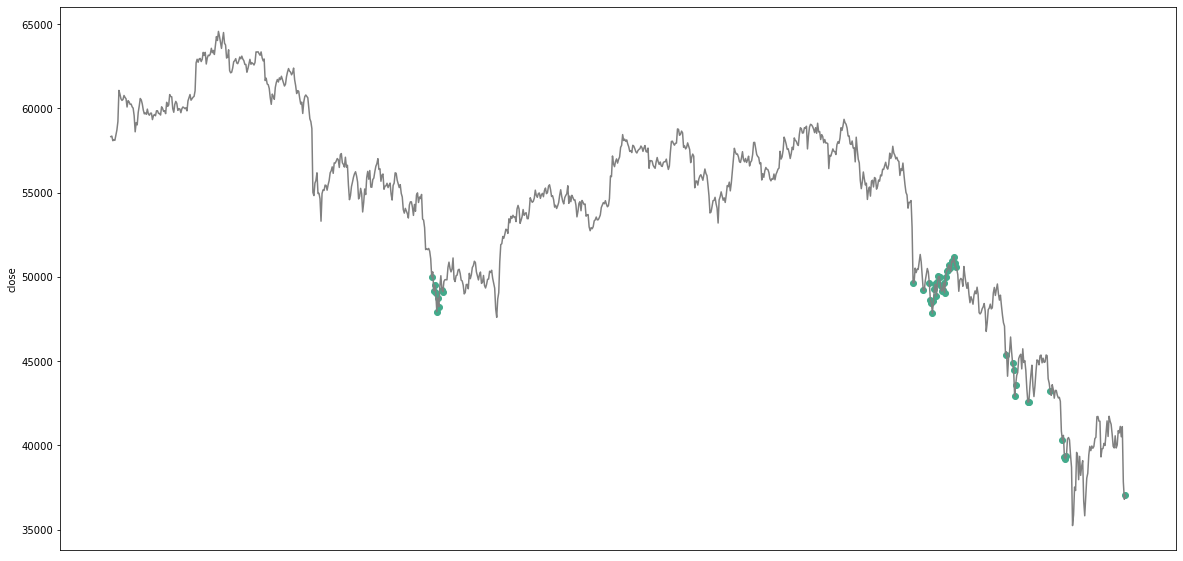

In [80]:
scatter_results = list(map(lambda x, c: c if x == 1 else None, results, close))

# s_correct = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, results, y_ft, close))
# s_wrong = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, results, y_ft, close))
# s_missed = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, results, y_ft, close))

fig,ax = plt.subplots(figsize=(20, 10))

rows = len(close)
ax.scatter(range(rows), 
            scatter_results,
            color="#43aa8b")


# ax.scatter(range(rows), 
#             s_missed,
#         color="#f9c74f")

# ax.scatter(range(rows), 
#             s_correct,
#         color="#43aa8b")

# ax.scatter(range(rows), 
#             s_wrong,
#         color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close,
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)